In [10]:
import numpy as np
import os

def read_files_from_dir(dir_path, file_extension='.txt'):
    """
    读取指定目录中所有指定扩展名的文件，并将内容合并到一个NumPy数组中。
    :param dir_path: 目录路径。
    :param file_extension: 要读取的文件的扩展名。
    :return: 包含所有文件数据的NumPy数组。
    """
    data_list = []
    
    # 检查目录是否存在
    if not os.path.isdir(dir_path):
        print(f"Directory does not exist: {dir_path}")
        return np.array([])  # 如果目录不存在，返回空数组
        
    # 获取指定目录下所有的指定扩展名的文件
    txt_files = [f for f in os.listdir(dir_path) if f.endswith(file_extension)]
    
    for file_name in txt_files:
        # 构建完整的文件路径
        file_path = os.path.join(dir_path, file_name)
        # 使用numpy.loadtxt读取数据
        try:
            data = np.loadtxt(file_path)
            # 如果数据为一维，增加一维以便于后续合并
            if data.ndim == 1:
                data = np.expand_dims(data, axis=0)
            # 将读取的数据添加到data_list中
            data_list.append(data)
        except Exception as e:
            # 如果读取过程中遇到问题，打印错误信息
            print(f"Error reading {file_path}: {e}")
    
    # 合并所有读取的数据到一个NumPy数组
    if data_list:
        data_tensor = np.vstack(data_list)
    else:
        data_tensor = np.array([])  # 如果没有读取到任何数据，返回空数组
    
    return data_tensor

# 指定要读取的目录
Generator_Loss_path = '../Generator'
Discriminator_Loss_path = '../Discriminator'

Generator_Loss = read_files_from_dir(Generator_Loss_path)
Generator_Loss = Generator_Loss * 0.5
Discriminator_Loss = read_files_from_dir(Discriminator_Loss_path)


print(Generator_Loss.shape)
print(Discriminator_Loss.shape)

(4, 82000)
(4, 82000)


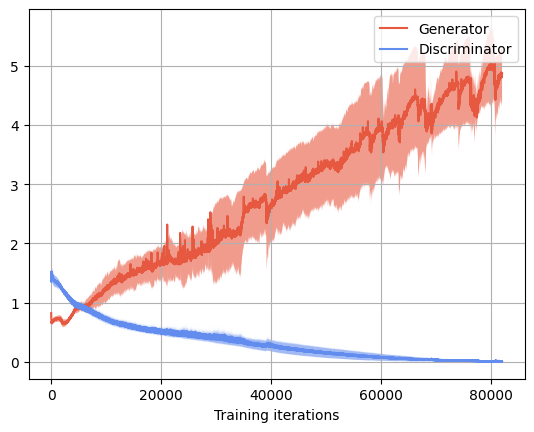

In [15]:
import matplotlib.pyplot as plt
import numpy as np

data_num = Generator_Loss.shape[1]
train_num = Generator_Loss.shape[0]
x = np.linspace(0, data_num, data_num)


Generator_mean = np.mean((np.array(Generator_Loss)), axis=0)
Generator_std = np.std((np.array(Generator_Loss)), axis=0)
Generator_max = Generator_mean + Generator_std * 0.95
Generator_min = Generator_mean - Generator_std * 0.95

Discriminator_mean = np.mean(Discriminator_Loss, axis=0)
Discriminator_std = np.std(Discriminator_Loss, axis=0)
Discriminator_max = Discriminator_mean + Discriminator_std * 0.95
Discriminator_min = Discriminator_mean - Discriminator_std * 0.95

fig = plt.figure(1)
plt.plot(x, Generator_mean, label='Generator', color='#e75840')
plt.plot(x, Discriminator_mean, label='Discriminator', color='#628cee')
plt.fill_between(x, Generator_max, Generator_min, alpha=0.6, facecolor='#e75840')
plt.fill_between(x, Discriminator_max, Discriminator_min, alpha=0.6, facecolor='#628cee')
plt.xlabel('Training iterations')
plt.legend()
plt.grid(True)
plt.savefig('train_Loss.png', dpi=300)
plt.show()


In [8]:
a = np.array([[1, 2 , 3],
              [5, 6, 7]])
mean = np.mean(a, axis=0)
print(mean)

[3. 4. 5.]
